# **Assignment5 : Healthcare Dataset**

Lakshita Markanday

GitHub - https://github.com/lakshitamarkanday777/Healthcare_dataset


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# 1. Basic info of the dataset

In [123]:
df = pd.read_csv('/content/file_downloaded')
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [124]:
df.shape

(1000, 14)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [126]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [127]:
df.duplicated().sum()

0

In [128]:
df['ID'].nunique()

800

In [129]:
df['CLASS'].nunique()

5

In [130]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1



Y= Yes, N = No, P = Prediabetes.
Expected 3 Classes, Got 5.

In [131]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

There are spaces in front of Y and N. Let's strip those.

In [132]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [133]:
df['Gender'].nunique()

3

In [134]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [135]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [136]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


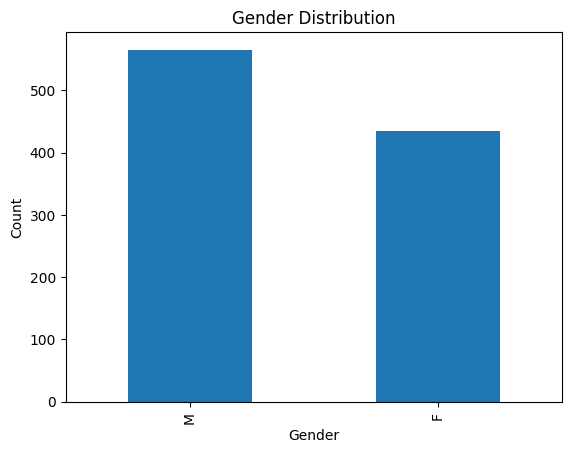

In [137]:
df['Gender'].value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [138]:
df['AGE'].nunique()

50

### Feature Engineering:
Create Age Range buckets to represent general healthcare reporting formats

In [139]:
age_range_buckets = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_range_buckets

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [140]:
df['age_range'] = pd.cut(x=df['AGE'], bins=8, labels=age_range_buckets)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


In [141]:
df['age_range'].value_counts()

,count
age_range,
[60 - 70),476
[70 - 80),274
[50 - 60),79
[40 - 50),58
[30 - 40),54
[80 - 90),36
[90 - 100),19
[20 - 30),4


In [142]:
# Select only numeric columns for correlation calculation
#correlation_values = df.corr()
import numpy as np
correlation_values = df.select_dtypes(include=np.number).corr()

In [143]:
correlation_values

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


<Axes: >

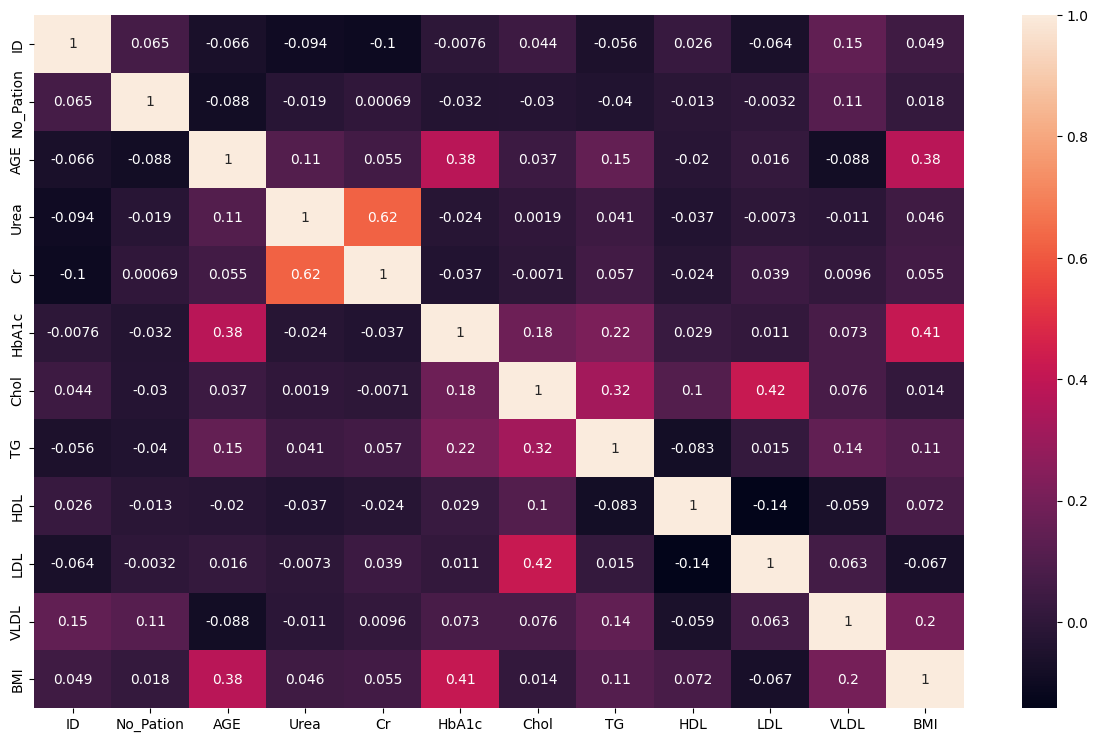

In [144]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [145]:
# No_Pation nuninique. Number of Partition is most likely an ID

df['No_Pation'].nunique()

961

In [146]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


# **2. EDA Analysis**

**Graph 1 - Distribution of Diabetes**

This depicts that how many people have diabetes (Y), not diabetic(N) and prediabetic(P). From the graph we can understand that many people are diabetic (above 800).

<ipython-input-147-b8287d3fa426>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='CLASS', data=df, palette='coolwarm')


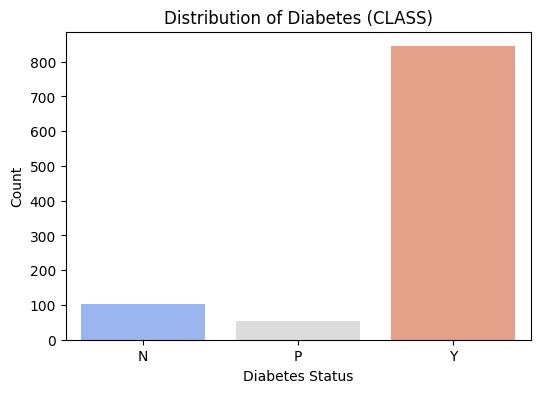

In [147]:
# ------------------ 3. CLASS DISTRIBUTION ------------------ #
plt.figure(figsize=(6,4))
ax= sns.countplot(x='CLASS', data=df, palette='coolwarm')

plt.title('Distribution of Diabetes (CLASS)')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

**Graph 2: Diabetes Distribution by Age Ranges**

**Key observations:**

1. The 60-70 age range shows the highest prevalence of diabetes (Y), with approximately 430 cases, followed by the 70-80 age range with about 260 cases.

2. Pre-diabetes (P) is minimally represented across all age groups, with very small numbers visible.

3. Non-diabetic individuals (N) are most common in the 50-60 age range, though still relatively few compared to diabetic cases.

4. Younger age groups (20-50) show more balanced distributions between diabetic and non-diabetic statuses, though overall numbers are much lower.
The oldest age groups (80-100) have very few cases overall, with most being diabetic.

This visualization reinforces the earlier findings that diabetes prevalence peaks dramatically in the 60-70 age range and remains high in the 70-80 range. It also provides context by showing how diabetes status is distributed across age groups, confirming that this dataset is heavily weighted toward diabetic patients, especially in older age ranges.

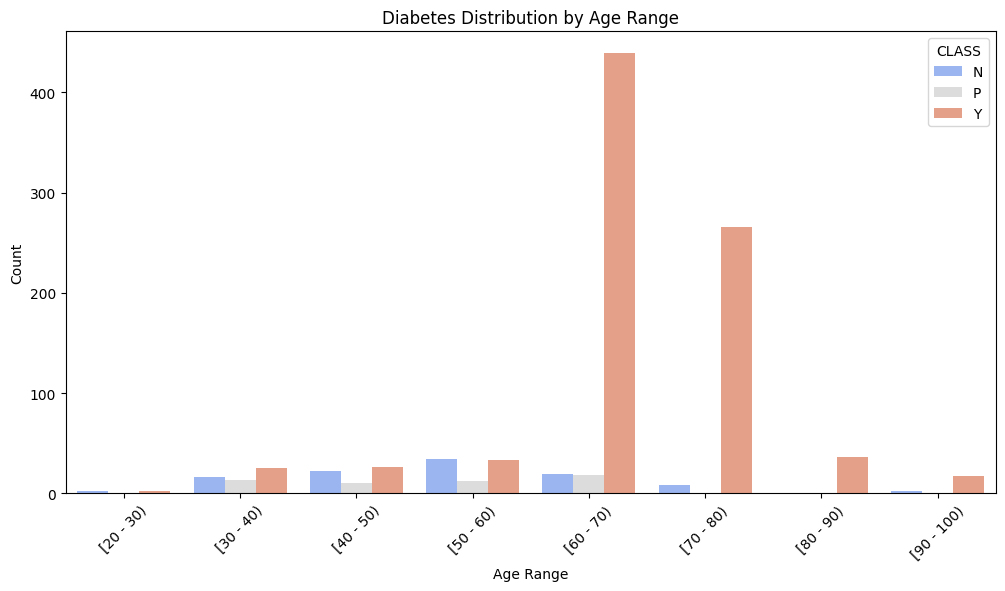

In [148]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_range', hue='CLASS', data=df, palette='coolwarm')
plt.title('Diabetes Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Graph 3: Gender based grapghs**

1. **HbA1c Levels by Gender** - The median HbA1c values appear very similar between genders
Males show slightly more variation in their upper quartile values
Both groups have values extending into concerning ranges (above 8.0% indicates less controlled diabetes)
The distributions largely overlap, suggesting no dramatic gender-based differences in glycemic control in this dataset.

2. **Urea levels by Gender** -
Males appear to have slightly higher baseline urea levels than females.
Both genders show numerous outliers, but males have more extreme high values
The majority of values for both genders fall within normal clinical ranges (typically 2.5-7.1 mmol/L)
The extreme outliers in both groups likely represent individuals with kidney dysfunction, as elevated urea is associated with decreased kidney function

3. **Cholesterol levels by Gender** -
The distributions are remarkably similar between genders
Both groups share similar median values
Males show slightly more extreme outliers in both directions
The majority of values fall within typical clinical reference ranges (3.9-5.2 mmol/L), though many individuals in both groups have elevated levels

4. **BMI levels by Gender** -
Males have a slightly higher median BMI than females
The male distribution appears slightly shifted toward higher BMI values
Both genders show considerable variation in BMI
Both distributions center around the "overweight" (25-29.9 kg/m²) to "obese" (30+ kg/m²) categories.
Extreme obesity (BMI > 40) appears more prevalent in males based on the outliers
The majority of patients in both gender groups fall into either overweight or obese categories, suggesting this might be a dataset of patients with metabolic health concerns

<ipython-input-149-f8af0d050514>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='HbA1c', data=df, palette='Set2')


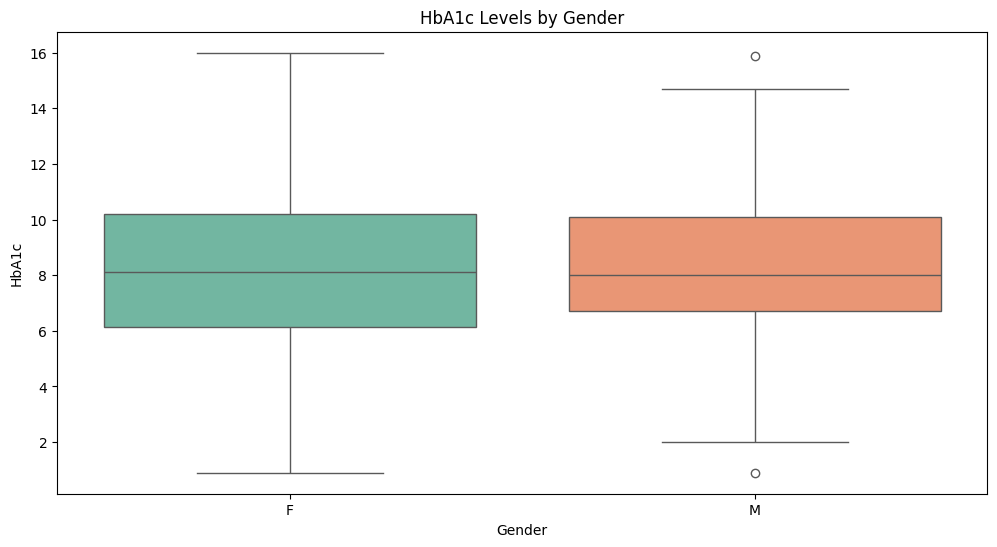

<ipython-input-149-f8af0d050514>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Urea', data=df, palette='Set2')


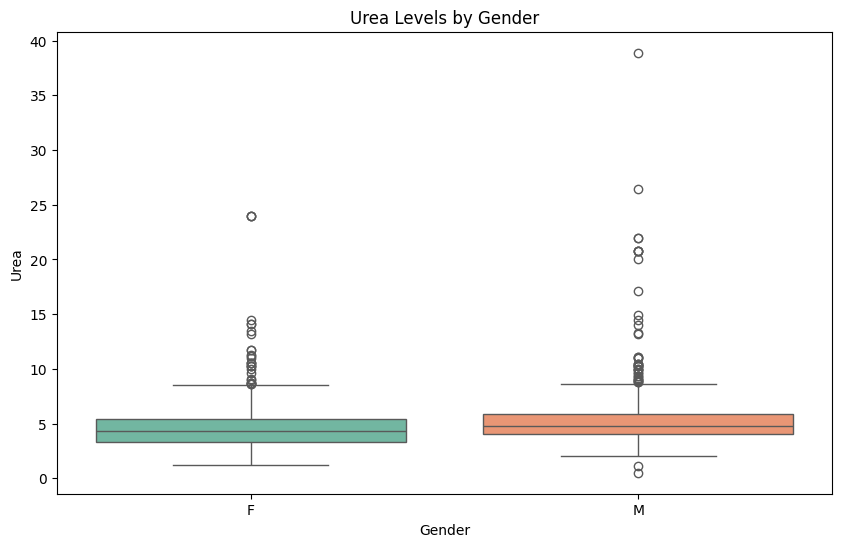

<ipython-input-149-f8af0d050514>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Chol', data=df, palette='Set2')


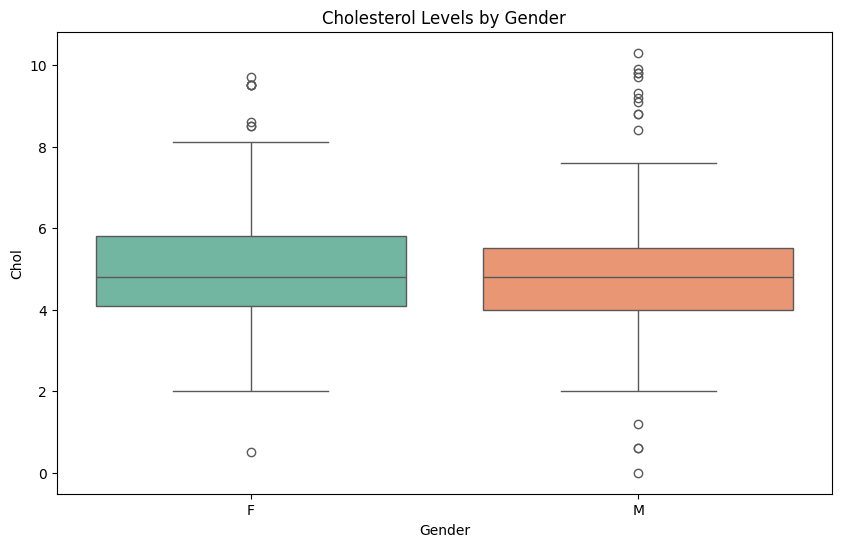

<ipython-input-149-f8af0d050514>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2')


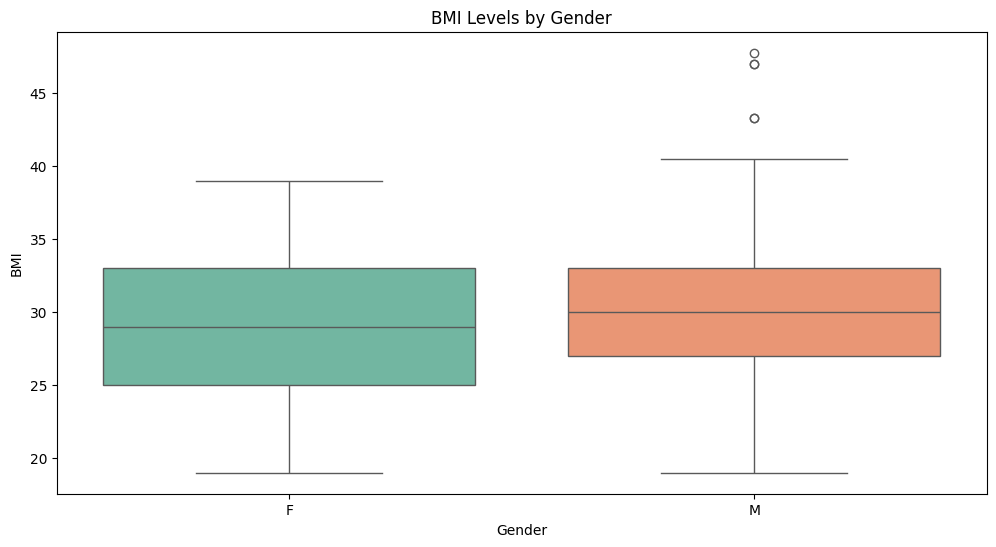

In [149]:
# GENDER-BASED INSIGHTS
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender', y='HbA1c', data=df, palette='Set2')
plt.title('HbA1c Levels by Gender')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Urea', data=df, palette='Set2')
plt.title('Urea Levels by Gender')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Chol', data=df, palette='Set2')
plt.title('Cholesterol Levels by Gender')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2')
plt.title('BMI Levels by Gender')
plt.show()

**Graph 4: Correlation Chart**

This correlation heatmap shows the relationships between various health metrics:
Strong positive correlations:

**Urea and Cr (Creatinine):** 0.62 - suggesting related kidney function metrics
HbA1c and BMI: 0.41 - higher glycated hemoglobin linked to higher body mass
Chol (Cholesterol) and LDL: 0.42 - expected as LDL is a component of total cholesterol
**HbA1c and AGE:** 0.38 - age is associated with higher HbA1c levels
AGE and BMI: 0.38 - older individuals tend to have higher BMI in this dataset

**Moderate positive correlations:**

Chol and TG (Triglycerides): 0.32
VLDL and BMI: 0.20
HbA1c and TG: 0.22
VLDL and ID: 0.15

**Notable weak or negative correlations:**

HDL has negative correlations with LDL (-0.14) and VLDL (-0.059)
Age shows a negative correlation with VLDL (-0.088)
No strong relationship between patient ID and most health metrics

The heatmap confirms some expected medical relationships, particularly between:

Kidney function markers (Urea and Creatinine)
Diabetes markers (HbA1c) and risk factors (BMI)
Different lipid profile components (Cholesterol, LDL, TG)

**The correlation between age and HbA1c reinforces what we saw in the first chart showing diabetes prevalence increasing with age.**

<Axes: >

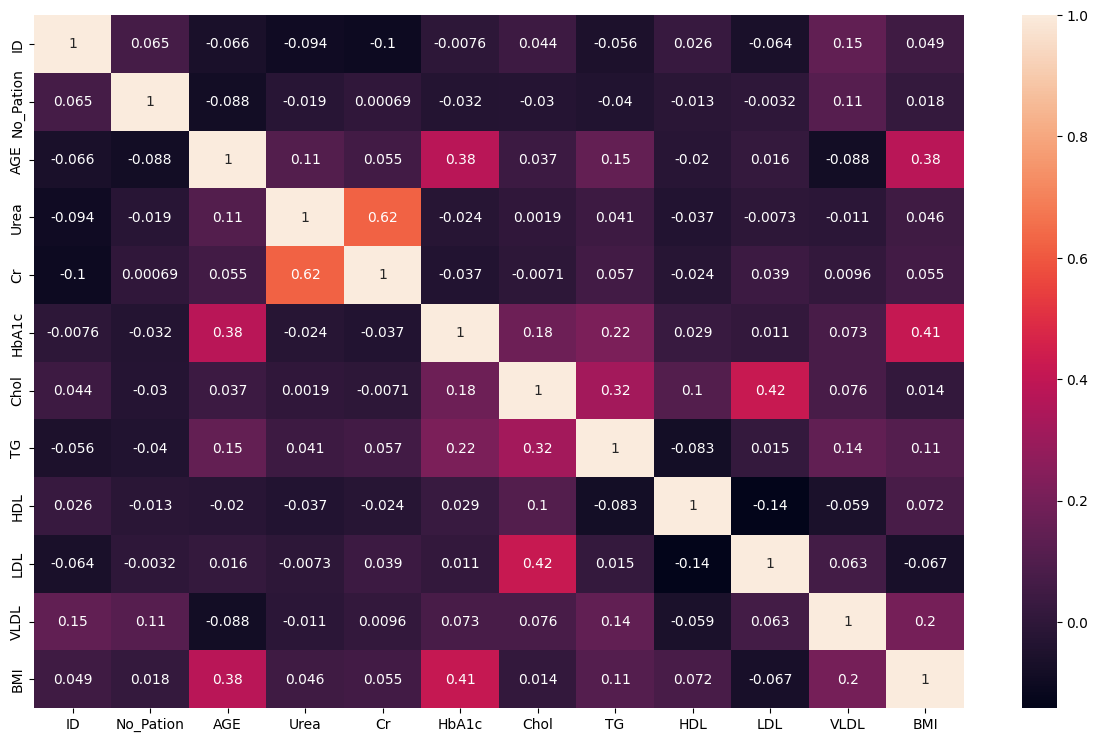

In [150]:

plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

**Graph 5: Outliers Analysis**

Cr (Creatinine) shows the most extreme outliers, with one value reaching approximately 800 and several others between 200-400, far exceeding the normal IQR (which appears to be roughly 30-80).

Both Urea and VLDL have some outliers, but they're less extreme than those in the Creatinine measurements.

BMI shows a higher median and larger IQR compared to most other metrics, with its distribution centered around 30-35.

The lipid markers (Chol, TG, HDL, LDL) show relatively compact distributions with fewer extreme outliers
HbA1c shows some high outliers but a relatively narrow IQR

This visualization is particularly valuable for understanding data quality issues that might affect analysis. The extreme Creatinine outliers (800+ range) likely represent either:

Patients with severe kidney disease
Potential measurement errors
Unit conversion issues

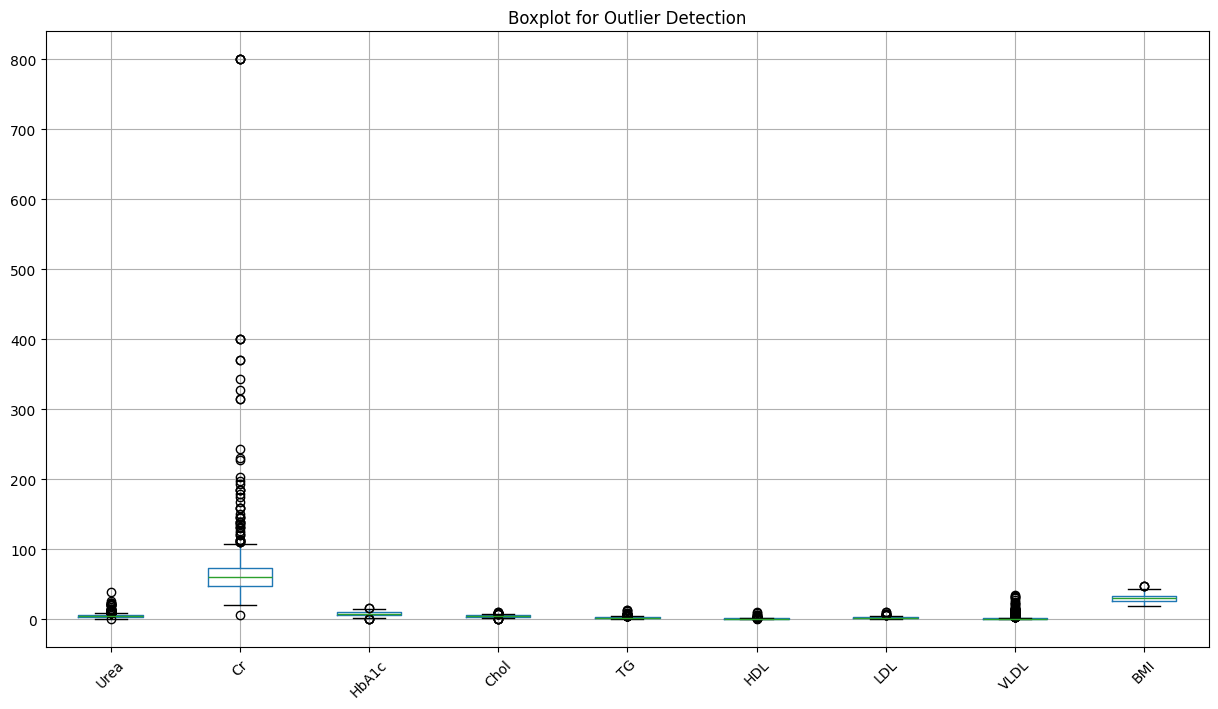

In [151]:
numeric_cols = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.show()

**Grapgh 6: FEATURE DISTRIBUTIONS**

These histograms provide detailed distributions of each health metric:

**Urea:** Strongly right-skewed with most values between 2-10 mmol/L, and a few extreme values extending to 40 mmol/L. The majority of patients have values below 10 mmol/L.

**Cr (Creatinine):** Highly right-skewed with most values below 100 µmol/L, but with extreme outliers extending to 800 µmol/L. This confirms the extreme outliers seen in the boxplot.

**HbA1c:** Approximately normal distribution centered around 8-9%, with values ranging from 2.5% to about 16%. This wide spread shows varying levels of glycemic control.

**Chol (Cholesterol):** Fairly symmetric distribution centered around 5-6 mmol/L, with most values between 3-8 mmol/L.

**TG (Triglycerides):** Right-skewed distribution with most values below 5 mmol/L, but some extending to 12.5 mmol/L.

**HDL: **Right-skewed with most values concentrated between 1-2 mmol/L, showing a narrow healthy range.
**LDL:** Slightly right-skewed with most values between 1-4 mmol/L.

**VLDL:** Extremely right-skewed with the vast majority below 5 mmol/L and a few outliers extending to 35 mmol/L.

**BMI:** Bimodal distribution with peaks around 30 and 35 kg/m², suggesting two distinct patient populations. Values range from 20 to 48 kg/m².

These distributions help explain the outliers seen in the previous boxplot and provide a clearer picture of the dataset's characteristics. The bimodal BMI distribution is particularly interesting, suggesting potentially different patient subgroups within the dataset.

<Figure size 1500x1200 with 0 Axes>

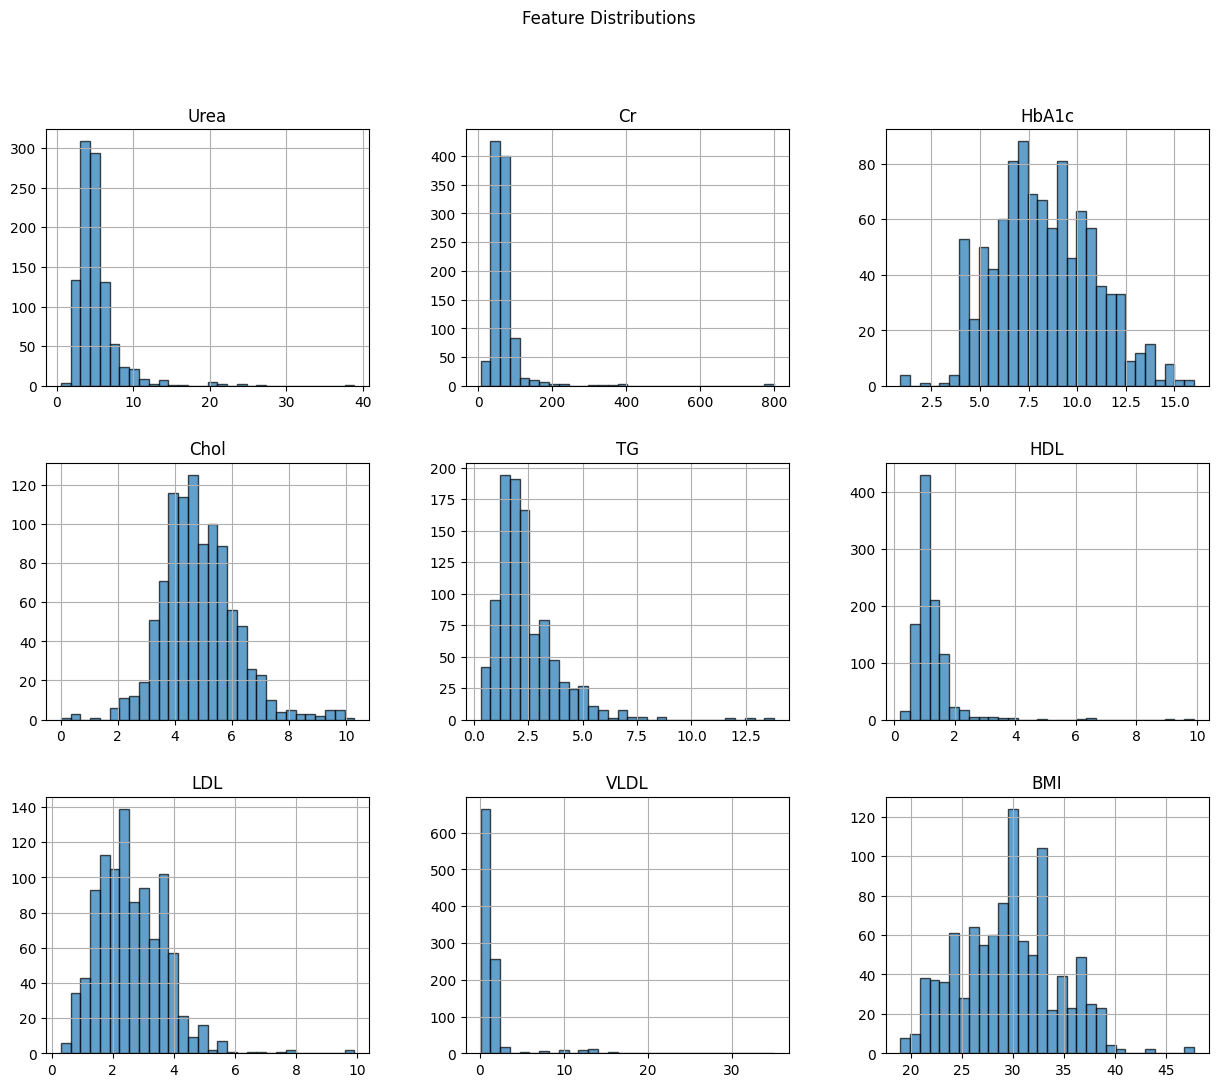

In [152]:
plt.figure(figsize=(15,12))
df[numeric_cols].hist(bins=30, figsize=(15,12), layout=(3,3), edgecolor='black', alpha=0.7)
plt.suptitle('Feature Distributions')
plt.show()

# **Machine Learning Modeling**

## Train Test Split

You should split your data into training and testing sets before applying any transformations, including scaling or standardization.

Reasoning:

Preventing Data Leakage: If you transform the entire dataset before splitting, information from the test set will influence the transformation applied to the training set. This is called data leakage and can lead to overly optimistic model performance estimates. The model might appear to perform well on the test set, but it's actually because it has already "seen" some information about the test set during the transformation process.

Real-World Simulation: When you deploy your model in the real world, it will encounter new, unseen data. By splitting before transformation, you simulate this scenario more accurately. The model is trained on a portion of the data and evaluated on a completely separate portion that it hasn't seen before, including during the transformation process

In [153]:
# No_Pation nuninique. Number of Partition is most likely an ID

df['No_Pation'].nunique()

961

In [154]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


In [155]:
# Split data into features (X) and target (y)
X = df2.drop('CLASS', axis=1)
y = df2['CLASS']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


## Encode Categorical Variables

Encoding Types

Label Encoding: Assigning a unique integer to each category in a categorical feature. Recommended for ordinal features (features with a natural order) or when the number of categories is large and one-hot encoding would create too many features.
One-Hot Encoding: Creating a new binary feature for each category in a categorical feature. Recommended for nominal features (features with no natural order) and when the number of categories is small.
When to Use

Label Encoding: Use when the order of the categories matters, or when dealing with high-cardinality categorical features.
One-Hot Encoding: Use when the order of the categories doesn't matter, or when the number of unique categories is low.

In [156]:


# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# Fit and transform the 'age_range' column
X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

# Encode CLASS- y_train
# Fit and transform the target variable for the training set
y_train = le.fit_transform(y_train)

# Transform the target variable for the test set using the same encoder
y_test = le.transform(y_test)

In [157]:
X_train['Gender'].value_counts()

,count
Gender,
1,456
0,344


In [158]:
X_train['age_range'].value_counts()

,count
age_range,
4,379
5,223
3,67
2,44
1,44
6,28
7,12
0,3


In [159]:
X_train.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,age_range
29,0,4.3,49,4.0,5.6,1.4,1.4,3.6,0.6,22.0,3
535,1,2.7,38,8.8,4.8,1.3,1.7,1.6,2.0,26.0,4
695,1,2.9,35,11.5,4.9,2.1,2.3,1.8,0.8,33.0,6
557,1,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,30.2,4
836,0,5.9,74,12.4,5.5,1.3,1.6,1.7,1.9,27.0,4


In [160]:
scaler = MinMaxScaler()

In [161]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = X_train[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
X_train_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
X_train_scaled.head()

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.161702,0.054156,0.205298,0.565657,0.081481,0.123711,0.329787,0.014925,0.104348
1,0.093617,0.040302,0.523179,0.484848,0.074074,0.154639,0.117021,0.056716,0.243478
2,0.102128,0.036524,0.701987,0.494949,0.133333,0.216495,0.138298,0.020896,0.486957
3,0.114894,0.054156,0.384106,0.464646,0.066667,0.113402,0.244681,0.011940,0.389565
4,0.229787,0.085642,0.761589,0.555556,0.074074,0.144330,0.127660,0.053731,0.278261


## Instantiate Models

In [162]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [163]:
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.8400
              precision    recall  f1-score   support

           0       0.33      0.24      0.28        21
           1       0.00      0.00      0.00         6
           2       0.89      0.94      0.91       173

    accuracy                           0.84       200
   macro avg       0.41      0.39      0.40       200
weighted avg       0.80      0.84      0.82       200

--------------------------------------------------
KNN Accuracy: 0.9250
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.33      0.33      0.33         6
           2       0.99      0.95      0.97       173

    accuracy                           0.93       200
   macro avg       0.66      0.71      0.68       200
weighted avg       0.93      0.93      0.93       200

--------------------------------------------------
NB Accuracy: 0.9450
              precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RFC Accuracy: 0.9900
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

--------------------------------------------------
DTR Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.67      1.00      0.80         6
           2       1.00      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.87      0.96      0.91       200
weighted avg       0.98      0.98      0.98       200

--------------------------------------------------
XGB Accuracy: 0.9850
              precision    recall  f1-score   support

           0      

<ipython-input-164-8ee903e88113>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=results, palette="coolwarm")


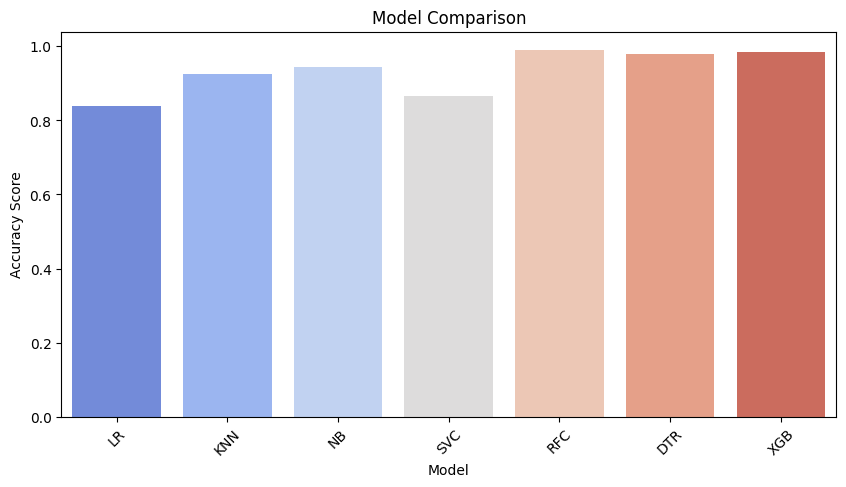

In [164]:
# Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=names, y=results, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

## Cross Validation

Cross-validation is a resampling technique used to evaluate the performance of machine learning models on unseen data. This is done by partitioning the data into subsets, training the model on some of the data, and then testing it on the remaining data.

Why is Cross-Validation Important?

Prevent Overfitting: Models can sometimes perform very well on the data they were trained on but poorly on new data (overfitting). Cross-validation helps to assess how well a model generalizes to unseen data and reduces overfitting.
Model Selection: You can use cross-validation to compare different machine learning algorithms and choose the one that performs the best for your dataset.
Hyperparameter Tuning: Cross-validation is essential for finding the optimal values for hyperparameters (settings that control how a model learns) to further improve model performance.

In [165]:
from sklearn.model_selection import KFold, cross_val_score # Import necessary classes

In [166]:

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Iterate through the models
for name, model in models:
  # Create a KFold object
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  # Store the results
  results.append(cv_results)
  names.append(name)

  # Print the mean and standard deviation of the accuracy scores
  print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

LR: 0.8513 (0.0139)
KNN: 0.8750 (0.0213)
NB: 0.9363 (0.0232)
SVC: 0.8387 (0.0183)
RFC: 0.9850 (0.0116)
DTR: 0.9800 (0.0061)
XGB: 0.9850 (0.0085)


## Make Predictions with best performing Model

In [167]:
# Since XGB is the best performing model based on the cross-validation results
best_model = XGBClassifier()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [168]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [169]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

Accuracy of the best model on the test dataset: 0.9850


In [170]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   6   0]
 [  1   1 171]]


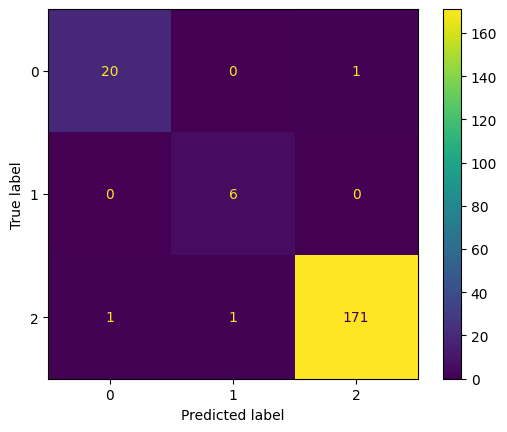

In [171]:
# You can also visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [172]:
df.shape

(1000, 15)

In [173]:
print("Original dataset shape:", df.shape)
print("Training dataset shape:", X_train.shape)
print("Test dataset shape:", X_test.shape)

# Check which columns were removed
missing_cols = set(df.columns) - set(X_train.columns)
print("Missing columns:", missing_cols)


Original dataset shape: (1000, 15)
Training dataset shape: (800, 11)
Test dataset shape: (200, 11)
Missing columns: {'AGE', 'No_Pation', 'CLASS', 'ID'}


# **Machine Learning Problems Solved**

 The code is training various models to predict a target variable "CLASS" based on several features which includes medical and demographic data like:

1. Gender
2. Age range
3. Medical measurements (Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI)

Its a medical classification task related to diagnosing diabetic condition based on patient characteristics and lab results.

**Model Evaluation**
The models were evaluated using multiple methods:

* **Initial Evaluation:** All models were first evaluated using accuracy score and classification reports on a test set (20% of the data).

* **Cross-Validation:** The models were then evaluated using 5-fold cross-validation to get a more robust estimate of performance.

* **Final Evaluation:** The best-performing model (XGBoost) was selected for final evaluation, which included:

                    * Accuracy score
                    * Classification report (precision, recall, F1-score)
                    * Confusion matrix visualization


The exact final accuracy score of the XGBoost model on the test set was calculated, but the specific value isn't shown in the final print statement.


**Best Performing Model**

According to the document, the **XGBoost (XGB) classifier** was identified as the best performing model based on cross-validation results.